# Perceptron



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
from MultiLayerPerceptron import MultiLayerPerceptron

# Important Functions

In [3]:
def plot_loss(epoch_his, train_loss_his, test_loss_his):
    train_line, = plt.plot(epoch_his,train_loss_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_loss_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Loss')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

In [4]:
def plot_accuracy(epoch_his, train_acc_his, test_acc_his):
    train_line, = plt.plot(epoch_his,train_acc_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_acc_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

# Perceptron Network

In [5]:
# Here I am building a normal forward propogation for a perceptron layer
# and the various function i would use.

In [6]:
#############################################
## Declaring Training Data        ############
#############################################
X_train = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_train = np.array([[1],[0],[0],[0]])

In [7]:
# Declare a neuron with shape of weights as [shape_of_input,1]
model = MultiLayerPerceptron([2,1],['sigmoid'])
# print(model.layers[1].W)
# print(model.layers[1].b)

(2, 1) (1,)
<function sigmoid at 0x7fb0ed010bf8>


In [8]:
# testing the model outputs
pred , _ = model.forward(X_train)
# print(np.sum((pred > 0.5)== Y_train) / Y_train.shape[0])
# accuracy(model , X_train,Y_train)
# X_train[0]

In [9]:
# Checking for testing purposes(BCE should be used here ideally)
from Loss import mean_abs_error,mean_square_error
loss,d_back = mean_square_error(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [0.22125216]
And the error to be back propogated is:
 [[-0.125     ]
 [ 0.17070035]
 [ 0.16161755]
 [ 0.19935455]]


In [10]:
from Loss import binary_cross_entropy
loss,d_back = binary_cross_entropy(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [1.11944334]
And the error to be back propogated is:
 [[-0.5       ]
 [ 0.7881498 ]
 [ 0.70715397]
 [ 1.23406928]]


In [11]:
# Now we can train the model by iteratively on each datapoint.

layer_list = [2,3,1]
activation_list = ['sigmoid','sigmoid']
model = MultiLayerPerceptron(layer_list,activation_list)


_=model.train(X_train,
            Y_train,
            X_train,
            Y_train,
            metric ='accuracy_binary',
            loss_function_string='binary_cross_entropy',
            epochs=1000,
            record_at=10)

(2, 3) (3,)
<function sigmoid at 0x7fb0ed010bf8>
(3, 1) (1,)
<function sigmoid at 0x7fb0ed010bf8>
0th EPOCH:
Training Loss:[0.95095922]|Training Accuracy:0.25|Test Loss:[0.91170746]|Test Accuracy:0.25
10th EPOCH:
Training Loss:[0.68877658]|Training Accuracy:0.75|Test Loss:[0.67411036]|Test Accuracy:0.75
20th EPOCH:
Training Loss:[0.58957365]|Training Accuracy:0.75|Test Loss:[0.58381704]|Test Accuracy:0.75
30th EPOCH:
Training Loss:[0.54941919]|Training Accuracy:0.75|Test Loss:[0.54695917]|Test Accuracy:0.75
40th EPOCH:
Training Loss:[0.53155894]|Training Accuracy:0.75|Test Loss:[0.53038107]|Test Accuracy:0.75
50th EPOCH:
Training Loss:[0.52241937]|Training Accuracy:0.75|Test Loss:[0.52173991]|Test Accuracy:0.75
60th EPOCH:
Training Loss:[0.51656151]|Training Accuracy:0.75|Test Loss:[0.51605201]|Test Accuracy:0.75
70th EPOCH:
Training Loss:[0.51165688]|Training Accuracy:0.75|Test Loss:[0.5111725]|Test Accuracy:0.75
80th EPOCH:
Training Loss:[0.5066664]|Training Accuracy:0.75|Test Loss:[

830th EPOCH:
Training Loss:[0.03062896]|Training Accuracy:1.0|Test Loss:[0.03055407]|Test Accuracy:1.0
840th EPOCH:
Training Loss:[0.02989361]|Training Accuracy:1.0|Test Loss:[0.02982171]|Test Accuracy:1.0
850th EPOCH:
Training Loss:[0.02918747]|Training Accuracy:1.0|Test Loss:[0.0291184]|Test Accuracy:1.0
860th EPOCH:
Training Loss:[0.02850899]|Training Accuracy:1.0|Test Loss:[0.02844261]|Test Accuracy:1.0
870th EPOCH:
Training Loss:[0.02785674]|Training Accuracy:1.0|Test Loss:[0.0277929]|Test Accuracy:1.0
880th EPOCH:
Training Loss:[0.02722936]|Training Accuracy:1.0|Test Loss:[0.02716794]|Test Accuracy:1.0
890th EPOCH:
Training Loss:[0.02662557]|Training Accuracy:1.0|Test Loss:[0.02656645]|Test Accuracy:1.0
900th EPOCH:
Training Loss:[0.0260442]|Training Accuracy:1.0|Test Loss:[0.02598725]|Test Accuracy:1.0
910th EPOCH:
Training Loss:[0.02548412]|Training Accuracy:1.0|Test Loss:[0.02542924]|Test Accuracy:1.0
920th EPOCH:
Training Loss:[0.02494428]|Training Accuracy:1.0|Test Loss:[0.0

In [12]:
# Now we can predict the values for unseen data or trained data also
# We can also calculate the accuracy of the model we have trained
model.metric_function(X_train,Y_train,metric='accuracy_binary')

1.0

# N Bit XOR

Now Lets try working with just a little better data. A n XOR operator. So lets create the dataset for n bit xor.

We would have atmost 2^n data point in this type of data set.But we would limit our dataset to a 1000 data points
whichever is smaller.

Then we can divide into training and test set

In [13]:
n = 10
max_datapoint = 10000
datapoints = min(pow(2,n) , max_datapoint)

X = np.zeros((datapoints , n) , dtype=np.int32)
Y = np.zeros((datapoints , 1), dtype=np.int32)

for i in range(datapoints):
    tmp = i
    y_tmp = 0
    for j in range(n-1 , -1 , -1):
        X[i,j] = tmp&1
        y_tmp = y_tmp^X[i,j]
        tmp = tmp>>1
    Y[i] = y_tmp
        
        

In [14]:
# for sanity check lets print one example
ind = 11
print(X[ind] , Y[ind])

[0 0 0 0 0 0 1 0 1 1] [1]


In [15]:
# Lets divide the set in training and testing
div = 0.9
train_n = int(div * datapoints)
X_train = X[:train_n]
Y_train = Y[:train_n]

X_test = X[train_n:]
Y_test = Y[train_n:]
Y_test.shape

(103, 1)

In [16]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','sigmoid','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7fb0ed029158>
(20, 20) (20,)
<function sigmoid at 0x7fb0ed010bf8>
(20, 15) (15,)
<function sigmoid at 0x7fb0ed010bf8>
(15, 8) (8,)
<function sigmoid at 0x7fb0ed010bf8>
(8, 4) (4,)
<function sigmoid at 0x7fb0ed010bf8>
(4, 1) (1,)
<function sigmoid at 0x7fb0ed010bf8>


In [17]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_binary',
                                                                                loss_function_string='binary_cross_entropy',
                                                                                epochs = 200,
                                                                                record_at = 10,
                                                                                learning_rate= 0.1,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:[1.3802321]|Training Accuracy:0.500542888165038|Test Loss:[1.05598754]|Test Accuracy:0.49514563106796117
10th EPOCH:
Training Loss:[0.69315198]|Training Accuracy:0.500542888165038|Test Loss:[0.69317821]|Test Accuracy:0.49514563106796117
20th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315834]|Test Accuracy:0.49514563106796117
30th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
40th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
50th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
60th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
70th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Tes

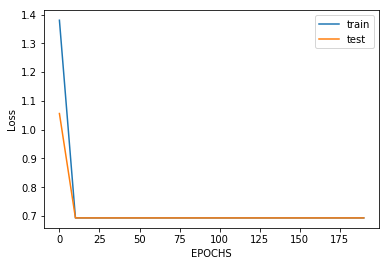

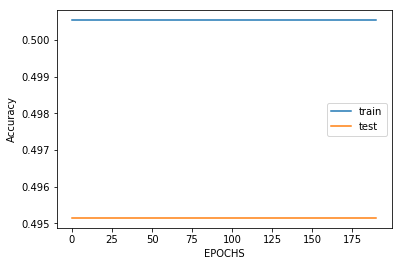

In [18]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# Simple Multiclass classification dataset

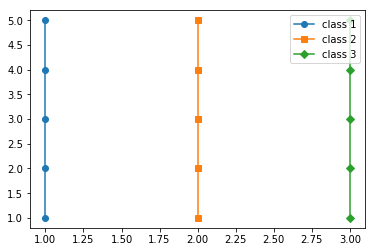

In [19]:
xcoords1 = [1,1,1,1,1]
xcoords2 = [2,2,2,2,2]
xcoords3 = [3,3,3,3,3]
ycoords = [1,2,3,4,5]
plt.plot(xcoords1, ycoords, label='class 1',marker='o')
plt.plot(xcoords2, ycoords, label='class 2',marker='s')
plt.plot(xcoords3, ycoords, label='class 3',marker='D')
plt.legend(loc='best')
plt.show()

In [20]:
#Making the dataset
dataset = [[i,j] for i in range(1,6) for j in range(1,4)]
labels = [[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]]

In [21]:
div = 0.8
N = len(dataset)
X_train = np.array(dataset[:int(div*N)])
Y_train = np.array(labels[:int(div*N)])
X_test = np.array(dataset[int(div*N):])
Y_test = np.array(labels[int(div*N):])

In [29]:
layer_list = [2,6,3]#,8,8,8,6,3]
activation_list = ['sigmoid','linear']#,'relu','relu','relu','relu']
model = MultiLayerPerceptron(layer_list,activation_list)

(2, 6) (6,)
<function sigmoid at 0x7fb0ed010bf8>
(6, 3) (3,)
<function linear at 0x7fb0ed029378>


In [30]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 80,
                                                                                record_at = 10,
                                                                                learning_rate= 0.1,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:1.000000082745371e-11|Training Accuracy:0.3333333333333333|Test Loss:25.3284360229345|Test Accuracy:0.3333333333333333
10th EPOCH:
Training Loss:0.8785976947070718|Training Accuracy:0.5833333333333334|Test Loss:0.8969058215284841|Test Accuracy:0.3333333333333333
20th EPOCH:
Training Loss:0.4722468207236621|Training Accuracy:0.9166666666666666|Test Loss:0.40432086931629346|Test Accuracy:1.0
30th EPOCH:
Training Loss:6.717027526459319|Training Accuracy:0.4166666666666667|Test Loss:8.985797351580828|Test Accuracy:0.3333333333333333
40th EPOCH:
Training Loss:0.39673769855964597|Training Accuracy:0.75|Test Loss:0.6472692693704216|Test Accuracy:0.6666666666666666
50th EPOCH:
Training Loss:0.3917402045553589|Training Accuracy:0.8333333333333334|Test Loss:0.6632469538951385|Test Accuracy:0.6666666666666666
60th EPOCH:
Training Loss:0.38150795055687353|Training Accuracy:0.9166666666666666|Test Loss:0.598560115362099|Test Accuracy:0.6666666666666666
70th EPOCH:
Training 

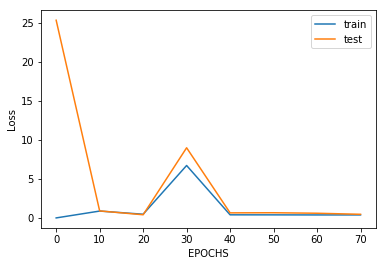

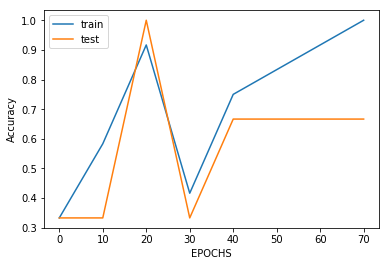

In [31]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# gene expression cancer RNA-Seq Data Set
From UCI Machine Learning Dataset Repository  
By Samuele Fiorini, University of Genoa  
Link : https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#

In [ ]:
dataset = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv')
labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv')